# New Section

## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Проектный практикум/

/content/drive/My Drive/Проектный практикум


In [ ]:
# !unzip Project5_train_data.zip

In [ ]:
taxi_data = pd.read_csv("train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [ ]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
print(taxi_data['pickup_datetime'].min())
print(taxi_data['pickup_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [ ]:
# а
print(taxi_data.vendor_id.nunique())

# б
print(taxi_data.passenger_count.max())

# в
print(taxi_data.trip_duration.mean().round())
print(taxi_data.trip_duration.median().round())

# г
print(taxi_data.trip_duration.min().round())
print(taxi_data.trip_duration.max().round())

2
9
959.0
662.0
1
3526282


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [ ]:
def add_datetime_features(df):
  """
  Функция добавляет:
  - дата включения счетчика
  - час включения счетчика
  - день недели включения счетчика

  Args:
    df - исходный датафрейм

  Returns:
    df - дополненный датафрейм
  """
  df['pickup_date'] = df["pickup_datetime"].dt.date
  df['pickup_hour'] = df["pickup_datetime"].dt.hour
  df['pickup_day_of_week'] = df["pickup_datetime"].dt.day_of_week
  return df

In [ ]:
taxi_data = add_datetime_features(taxi_data)

In [ ]:
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,1


In [ ]:
# а
taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0]

220868

In [ ]:
# б
mean_per_day = taxi_data.shape[0] / taxi_data['pickup_date'].nunique()
round(mean_per_day)

8015

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [ ]:
def add_holiday_features(df_taxi, df_holiday):
  """
  Функция добавляет бинарный признак - начата ли поездка в праздничный день

  Args:
    df_taxi - таблица с данными о поездках
    df_holiday - таблица с данными о праздничных днях

  Returns:
    df_holiday - дополненный датафрейм
  """
  df_taxi['pickup_holiday'] = df_taxi['pickup_date'].apply(lambda x: 1 if str(x) in df_holiday['date'].values else 0)
  return df_taxi

In [ ]:
# файл с праздничными датами
holiday_data = pd.read_csv('holiday_data.csv', sep=';')
holiday_data

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


In [ ]:
taxi_data = add_holiday_features(taxi_data, holiday_data)

In [ ]:
taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median()

585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [ ]:
# !unzip osrm_data_train.zip

In [ ]:
# файл osrm
osrm_data = pd.read_csv('osrm_data_train.csv')

In [ ]:
osrm_data

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."
...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id2976426,Cargo Plaza,East 51st Street,28051.1,1462.5,13,Cargo Plaza|Cargo Plaza|Van Wyck Expressway|Ca...,145.4|1039|12154.4|931.8|6422.3|3745.6|2032.5|...,21|82.8|489.4|57.2|359.5|164.1|139.9|14.4|2.9|...,depart|on ramp|new name|off ramp|merge|fork|ne...,right|slight right|straight|slight right|sligh...,"-73.78445,40.648461|-73.785844,40.647851|-73.7..."
1458639,id1440046,Former Terminal 6 Departures,3rd Avenue,29616.3,1643.2,16,Former Terminal 6 Departures|Cargo Plaza|Cargo...,110.2|415.2|895.1|12154.4|931.8|6422.3|1686.5|...,15.9|63.9|71.6|489.4|57.2|359.5|81.8|19.4|10.3...,depart|fork|on ramp|new name|off ramp|merge|fo...,right|slight left|straight|straight|slight rig...,"-73.779336,40.647005|-73.780349,40.64763|-73.7..."
1458640,id1607338,Cargo Plaza,West 8th Street,25615.0,1765.1,30,Cargo Plaza|Cargo Plaza|Cargo Plaza|Cargo Plaz...,179.5|66.3|314.8|431.8|1557.5|266.3|454.7|604|...,28|9.5|25.2|34.5|62|21.3|36.6|24.1|25.2|238.2|...,depart|fork|on ramp|fork|new name|off ramp|for...,none|slight right|straight|slight left|straigh...,"-73.786697,40.641627|-73.78622,40.643052|-73.7..."
1458641,id2071901,Cargo Plaza,Laurel Hill Boulevard,20284.1,1074.3,14,Cargo Plaza|Cargo Plaza|Cargo Plaza|Van Wyck E...,124.3|535.2|895.1|12154.4|931.8|1521.6|573.1|3...,22|79|71.6|489.4|57.2|85.4|45.9|28.5|22.2|9.5|...,depart|fork|fork|new name|off ramp|merge|off r...,right|straight|slight left|straight|slight rig...,"-73.782317,40.644873|-73.780877,40.645095|-73...."


In [ ]:
def add_osrm_features(df_taxi, df_osrm):
  """
  Функция добавляет в датафрейм инфо:
    - total_distance
    - total_travel_time
    - number_of_steps

  Args:
    df_taxi - таблица с данными о поездках
    df_osrm - таблица с данными osrm

  Returns:
    df_taxi - дополненный датафрейм
  """
  df_osrm = df_osrm[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
  return df_taxi.merge(df_osrm,
                       on = 'id',
                       how = 'left')

In [ ]:
taxi_data = add_osrm_features(taxi_data, osrm_data)

In [ ]:
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,4,0,2234.6,311.7,8.0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,6,0,7638.0,589.6,11.0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,4,0,9871.5,642.9,10.0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,1,0,1628.3,161.6,7.0


In [ ]:
print(round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()))

372


In [ ]:
# а
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [ ]:
# б
taxi_data[taxi_data['total_distance'].isnull()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
1133561,id3008062,2,2016-06-23 19:04:09,2016-06-23 19:04:35,1,-73.787537,40.64241,-73.787811,40.642109,N,26,2016-06-23,19,3,0,NaN,NaN,NaN


In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    """
    Функция для вычисления расстояния Хаверсина (км)

    Args:
        lat1 и lng1 (array): широта и долгота первой точки
        lat2 и lng2 (array): широта и долгота второй точки

    Returns:
        h (float): расстояние между двумя точками на сфере
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    """
    Функция для вычисления угла направления движения (град)

    Args:
        lat1 и lng1 (array): широта и долгота первой точки
        lat2 и lng2 (array): широта и долгота второй точки

    Returns:
        alpha (float): угол направления движения от первой точки ко второй
    """
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [ ]:
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,4,0,2234.6,311.7,8.0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,6,0,7638.0,589.6,11.0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,4,0,9871.5,642.9,10.0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,1,0,1628.3,161.6,7.0


In [ ]:
def add_geographical_features(df):
  """
  Функция добавляет в датафрейм инфо:
    - haversine_distance
    - direction

  Args:
    df - исходный датафрейм

  Returns:
    df - дополненный датафрейм
  """
  df['haversine_distance'] = get_haversine_distance(
      lat1 = df['pickup_latitude'],
      lng1 = df['pickup_longitude'],
      lat2 = df['dropoff_latitude'],
      lng2 = df['dropoff_longitude']
      )

  df['direction'] = get_angle_direction(
    lat1 = df['pickup_latitude'],
    lng1 = df['pickup_longitude'],
    lat2 = df['dropoff_latitude'],
    lng2 = df['dropoff_longitude']
    )
  return df

In [ ]:
taxi_data = add_geographical_features(taxi_data)

In [ ]:
taxi_data['haversine_distance'].median().round(2)

2.09

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [ ]:
def add_cluster_features(df, cluster):
    """
    Функция добавляющая в датафрейм
    географический кластер, к которому относится поездка

    Args:
        df - исходный датафрейм
        cluster - алгоритм кластеризации

    Returns:
        df - дополненный датафрейм
    """
    df['geo_cluster'] = cluster.predict(df[['pickup_latitude',
                                            'pickup_longitude',
                                            'dropoff_latitude',
                                            'dropoff_longitude']]
                                        )
    return df

In [ ]:
taxi_data = add_cluster_features(taxi_data, kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [ ]:
taxi_data['geo_cluster'].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [ ]:
# !unzip weather_data.zip

In [ ]:
weather_data = pd.read_csv('weather_data.csv')

In [ ]:
weather_data

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,2017-01-01 21:00:00,5.0,3.3,NaN,0.43,1028.5,-6.7,16.1,ENE,7.4,0.0,0.0,None,Clear,2017-01-01,21
8783,2017-01-01 22:00:00,5.6,3.6,NaN,0.38,1029.3,-7.8,16.1,NE,9.3,0.0,0.0,None,Clear,2017-01-01,22
8784,2017-01-01 23:00:00,5.6,4.0,NaN,0.38,1030.2,-7.8,16.1,NE,7.4,0.0,0.0,None,Clear,2017-01-01,23
8785,2017-01-02 00:00:00,5.0,3.3,NaN,0.41,1030.6,-7.2,16.1,ENE,7.4,0.0,0.0,None,Clear,2017-01-02,0


In [ ]:
def add_weather_features(df_taxi, df_weather):
  """
  Функция добавляет в датафрейм инфо о погоде

  Args:
    df_taxi - датафрейм с поездками
    df_weather - датафрейм с погодой

  Returns:
    df_taxi - дополненный датафрейм
  """
  df_weather['time'] = pd.to_datetime(df_weather['time'], format='%Y-%m-%d %H:%M:%S')

  df_weather['date'] = df_weather['time'].dt.date
  df_weather['hour'] = df_weather['time'].dt.hour
  df_weather = df_weather[['temperature',
                           'visibility',
                           'wind speed',
                           'precip',
                           'events',
                           'date',
                           'hour']]
  df_merged = df_taxi.merge(df_weather,
                            how = 'left',
                            left_on = ['pickup_date', 'pickup_hour'],
                            right_on = ['date', 'hour']
                            )
  df_merged = df_merged.drop(['date', 'hour'], axis = 1)
  return df_merged

In [ ]:
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,311.7,8.0,1.225080,-119.059338,0,7.8,16.1,11.1,0.0,None
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,589.6,11.0,6.049836,25.342196,9,7.2,2.8,18.5,8.1,Rain
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,642.9,10.0,7.824606,-150.788492,4,18.3,16.1,0.0,0.0,None
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,161.6,7.0,1.092564,35.033294,0,-2.8,16.1,9.3,0.0,None


In [ ]:
# а
taxi_data['events'].value_counts()

None    1375185
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

In [ ]:
# а
print("Процент пропусков по столбцам")
for col in taxi_data.columns:
  percent = taxi_data[col].isna().sum() / taxi_data[col].shape[0] * 100
  print(f"{col: <25}: {percent:.5f}%")

Процент пропусков по столбцам
id                       : 0.00000%
vendor_id                : 0.00000%
pickup_datetime          : 0.00000%
dropoff_datetime         : 0.00000%
passenger_count          : 0.00000%
pickup_longitude         : 0.00000%
pickup_latitude          : 0.00000%
dropoff_longitude        : 0.00000%
dropoff_latitude         : 0.00000%
store_and_fwd_flag       : 0.00000%
trip_duration            : 0.00000%
pickup_date              : 0.00000%
pickup_hour              : 0.00000%
pickup_day_of_week       : 0.00000%
pickup_holiday           : 0.00000%
total_distance           : 0.00007%
total_travel_time        : 0.00007%
number_of_steps          : 0.00007%
haversine_distance       : 0.00000%
direction                : 0.00000%
geo_cluster              : 0.00000%
temperature              : 0.82488%
visibility               : 0.82488%
wind speed               : 0.82488%
precip                   : 0.82488%
events                   : 0.82488%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [ ]:
def fill_null_weather_data(df):
  """
  Функция заполняет пропущенные значения в столбцах

  Args:
    df - датафрейм с поездками

  Returns:
    df - дополненный датафрейм
  """

  weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
  for col in weather_cols:
    df[col] = df[col].fillna(df.groupby('pickup_date')[col].transform('median'))

  df['events'] = df['events'].fillna('None')

  values = {
      'total_distance': df['total_distance'].median(),
      'total_travel_time': df['total_travel_time'].median(),
      'number_of_steps': df['number_of_steps'].median(),
      }

  df = df.fillna(values)
  return df

In [ ]:
taxi_data = fill_null_weather_data(taxi_data)

In [ ]:
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


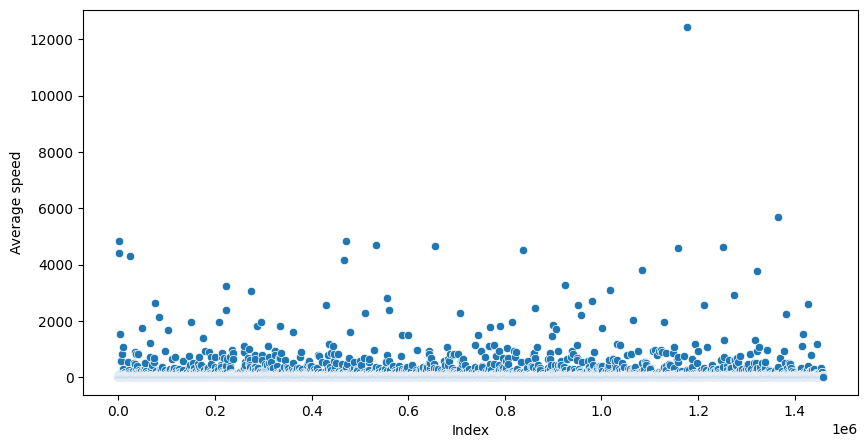

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [ ]:
# а
taxi_data[taxi_data['trip_duration'] > 24*3600].shape[0]

4

In [ ]:
# б
avg_speed[avg_speed > 300].shape[0]

407

In [ ]:
taxi_data = taxi_data[(taxi_data['trip_duration'] <= 24*3600) & (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 <= 300)]
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,311.7,8.0,1.225080,-119.059338,0,7.8,16.1,11.1,0.0,None
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,589.6,11.0,6.049836,25.342196,9,7.2,2.8,18.5,8.1,Rain
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,642.9,10.0,7.824606,-150.788492,4,18.3,16.1,0.0,0.0,None
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,161.6,7.0,1.092564,35.033294,0,-2.8,16.1,9.3,0.0,None


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [ ]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

Text(0, 0.5, 'количество')

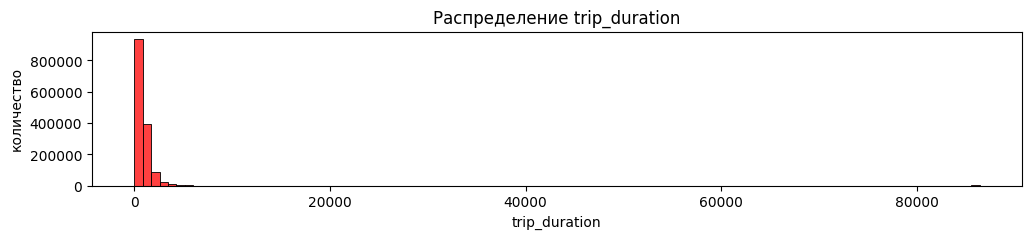

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.histplot(data=taxi_data,
             color = 'red',
             x=taxi_data['trip_duration'],
             bins = 100)
plt.title("Распределение trip_duration")
plt.ylabel("количество")

Text(0, 0.5, 'log количество')

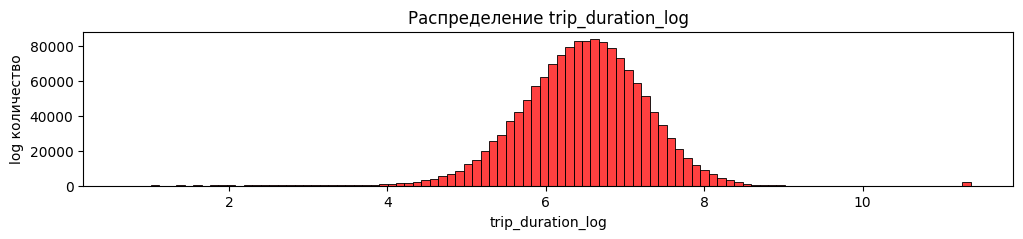

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.histplot(data=taxi_data,
             color = 'red',
             x=taxi_data['trip_duration_log'],
             bins = 100)
plt.title("Распределение trip_duration_log")
plt.ylabel("log количество")

Text(0.5, 1.0, 'Boxplot of trip_duration_log')

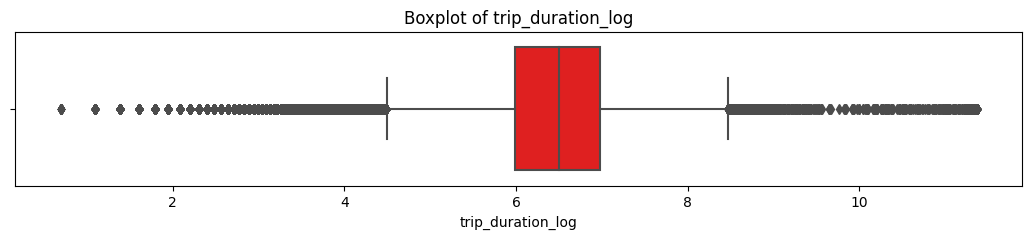

In [ ]:
fig=plt.figure(figsize=(13, 2))
sns.boxplot(data=taxi_data,
            color = 'red',
            x=taxi_data['trip_duration_log'])
plt.title("Boxplot of trip_duration_log")

In [ ]:
# уровень значимости
alpha = 0.05

In [ ]:
H0 = 'Нулевая гипотеза - распределение нормальное'
Ha = 'Альтернативная гипотеза - распределение отлично от нормального'

In [ ]:
# а
st, p = stats.normaltest(taxi_data['trip_duration_log'])
print(f'P-value = {round(p, 2)}')

P-value = 0.0


In [ ]:
# б
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print(Ha)
else:
    print(H0)

Альтернативная гипотеза - распределение отлично от нормального


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

Text(0, 0.5, 'log количество')

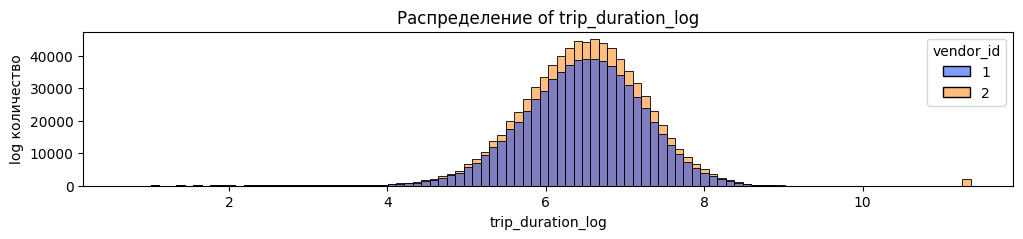

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.histplot(data=taxi_data,
             x="trip_duration_log",
             hue="vendor_id",
             palette = "bright",
             alpha = 0.5,
             bins=100)
plt.title("Распределение of trip_duration_log")
plt.ylabel("log количество")

In [ ]:
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')

Text(0.5, 1.0, 'Распределение of trip_duration_log')

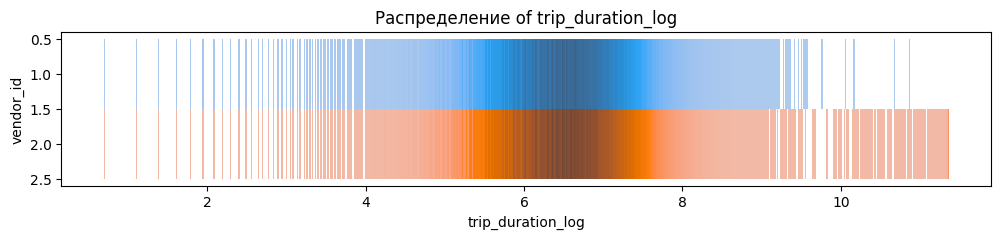

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.histplot(taxi_data,
             x="trip_duration_log",
             y="vendor_id",
             hue="vendor_id",
             legend=False)
plt.title("Распределение of trip_duration_log")

Text(0.5, 1.0, 'Boxplot of trip_duration_log')

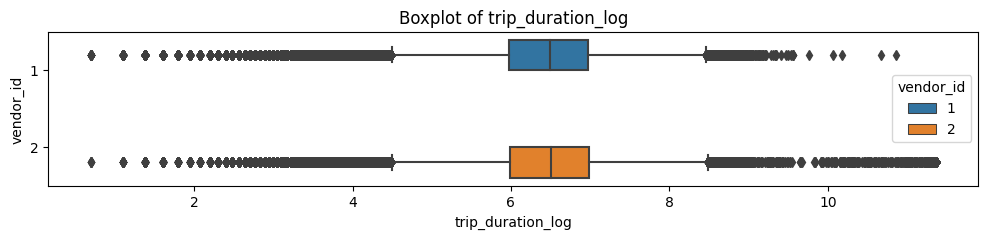

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.boxplot(data=taxi_data,
            x="trip_duration_log",
            y="vendor_id",
            hue="vendor_id")
plt.title("Boxplot of trip_duration_log")

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

In [ ]:
taxi_data.store_and_fwd_flag.value_counts()

N    1450192
Y       8041
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Распределение of trip_duration_log')

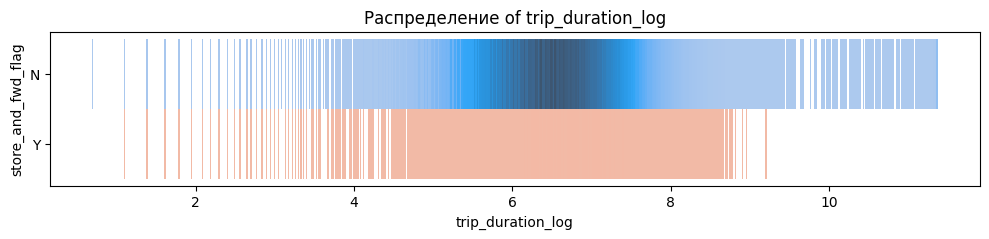

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.histplot(taxi_data,
             x="trip_duration_log",
             y="store_and_fwd_flag",
             hue="store_and_fwd_flag",
             legend=False)
plt.title("Распределение of trip_duration_log")

Text(0.5, 1.0, 'Boxplot of trip_duration_log')

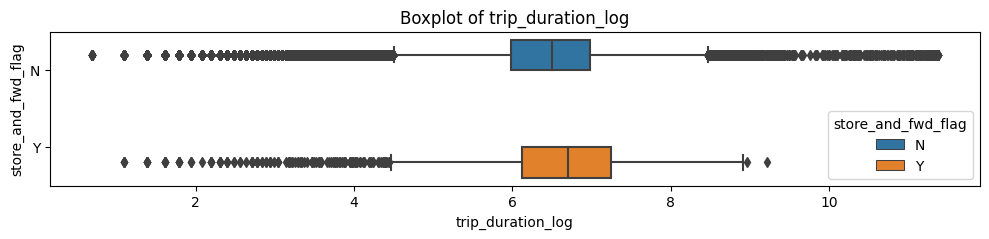

In [ ]:
fig=plt.figure(figsize=(12, 2))
sns.boxplot(data=taxi_data,
            x="trip_duration_log",
            y="store_and_fwd_flag",
            hue="store_and_fwd_flag")
plt.title("Boxplot of trip_duration_log")

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

Text(0.5, 1.0, 'Распределение количества trip по hour')

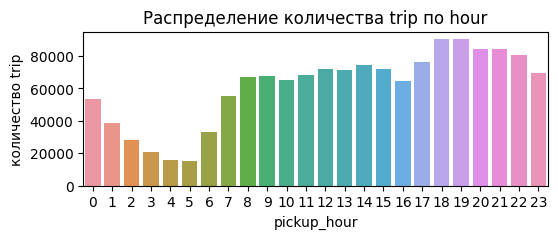

In [ ]:
# а
data = taxi_data['pickup_hour'].value_counts().reset_index()
plt.figure(figsize=(6,2))
sns.barplot(data=data, x="index", y="pickup_hour")
plt.xlabel("pickup_hour")
plt.ylabel("количество trip")
plt.title("Распределение количества trip по hour")

Text(0.5, 1.0, 'Распределение duration по hour')

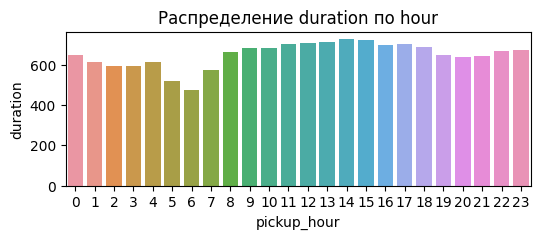

In [ ]:
# б
duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median().reset_index()
duration_by_hour = pd.DataFrame(duration_by_hour)

plt.figure(figsize=(6,2))
sns.barplot(duration_by_hour, x="pickup_hour", y="trip_duration")
plt.xlabel("pickup_hour")
plt.ylabel("duration")
plt.title("Распределение duration по hour")

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [ ]:
list(taxi_data.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'pickup_date',
 'pickup_hour',
 'pickup_day_of_week',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine_distance',
 'direction',
 'geo_cluster',
 'temperature',
 'visibility',
 'wind speed',
 'precip',
 'events',
 'trip_duration_log']

Text(0.5, 1.0, 'Распределение количества trip по day_of_week')

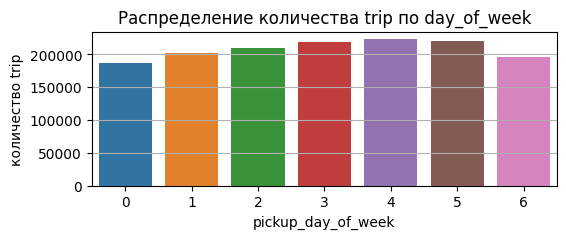

In [ ]:
data = taxi_data['pickup_day_of_week'].value_counts().reset_index()
plt.figure(figsize=(6,2))
plt.grid()
sns.barplot(data=data, x="index", y="pickup_day_of_week")
plt.xlabel("pickup_day_of_week")
plt.ylabel("количество trip")
plt.title("Распределение количества trip по day_of_week")

Text(0.5, 1.0, 'Распределение duration по day_of_week')

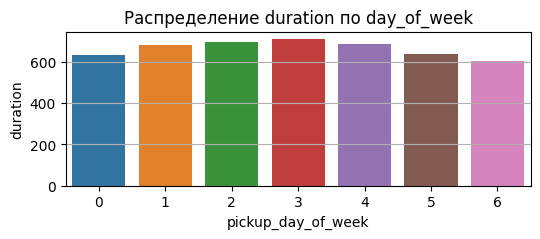

In [ ]:
duration_by_hour = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().reset_index()
duration_by_hour = pd.DataFrame(duration_by_hour)

plt.figure(figsize=(6,2))
plt.grid()
sns.barplot(duration_by_hour, x="pickup_day_of_week", y="trip_duration")
plt.xlabel("pickup_day_of_week")
plt.ylabel("duration")
plt.title("Распределение duration по day_of_week")

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [ ]:
pivot = taxi_data.pivot_table(values='trip_duration',
                              index='pickup_hour',
                              columns='pickup_day_of_week',
                              aggfunc='median')

Text(0.5, 1.0, 'trip_duration по pickup_hour и pickup_day_of_week')

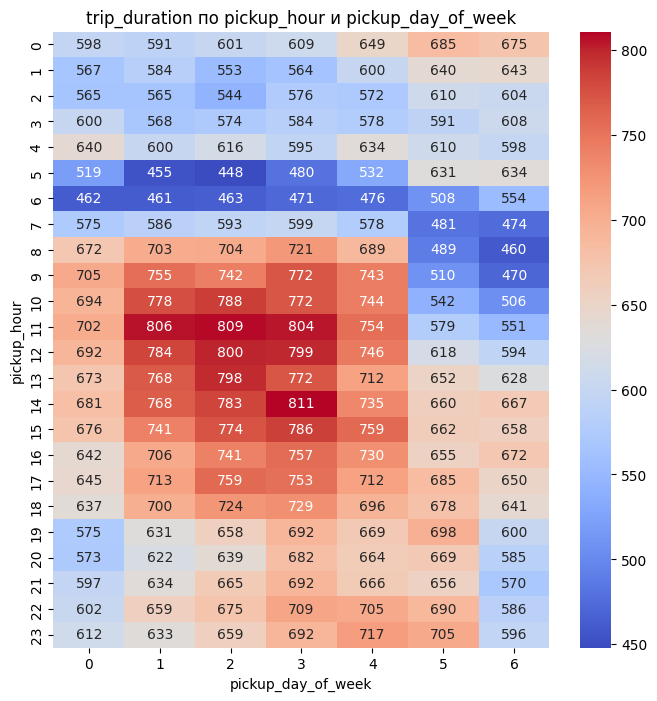

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(pivot,
            cmap="coolwarm",
            annot=True,
            fmt='.0f')
plt.title("trip_duration по pickup_hour и pickup_day_of_week")

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.


In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

(40.63, 40.85)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


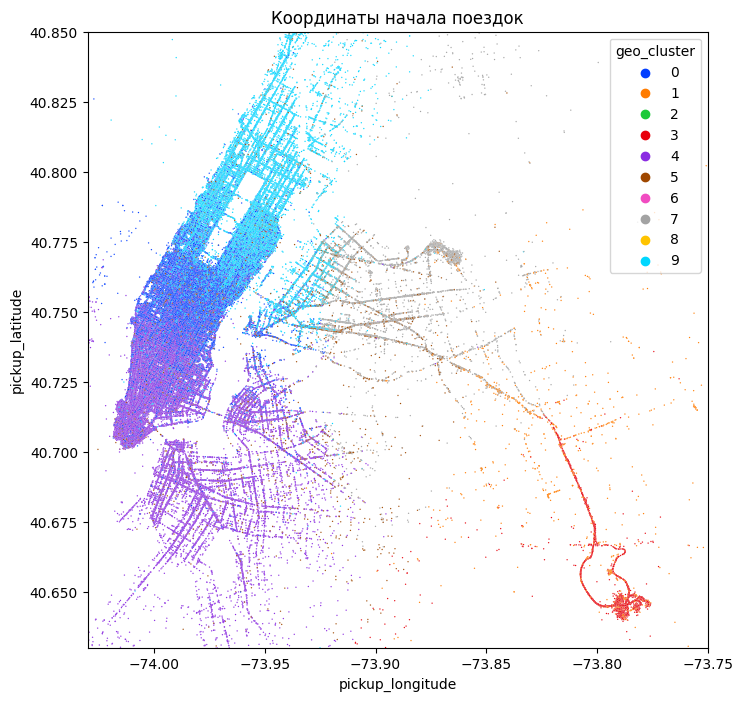

In [ ]:
plt.figure(figsize=(8,8))
map_pickup = sns.scatterplot(data=taxi_data,
                             x='pickup_longitude',
                             y='pickup_latitude',
                             hue="geo_cluster",
                             s = 1,
                             palette = "bright")

map_pickup.set_title('Координаты начала поездок')
map_pickup.set_xlim(city_long_border)
map_pickup.set_ylim(city_lat_border)

(40.63, 40.85)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


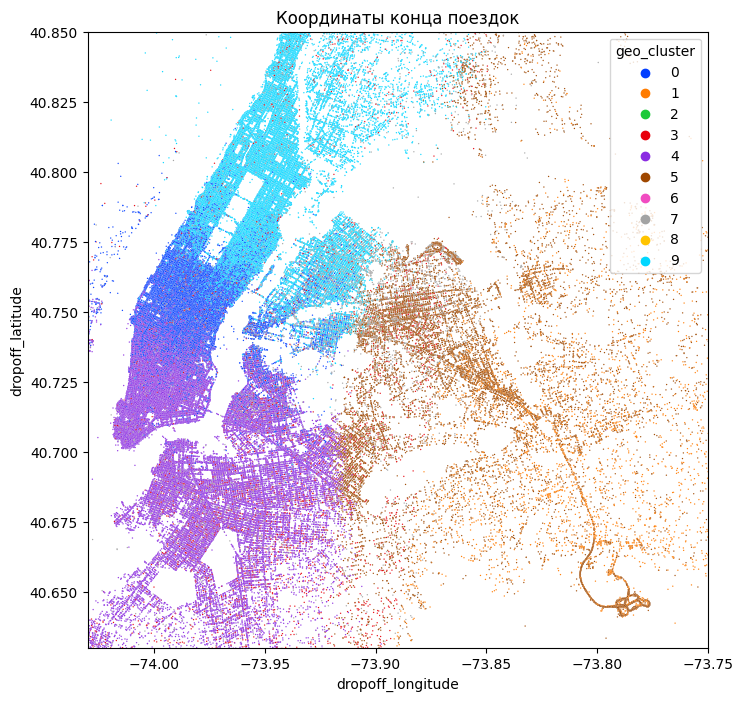

In [ ]:
plt.figure(figsize=(8,8))
map_pickup = sns.scatterplot(data=taxi_data,
                             x='dropoff_longitude',
                             y='dropoff_latitude',
                             hue="geo_cluster",
                             s = 1,
                             palette = "bright")

map_pickup.set_title('Координаты конца поездок')
map_pickup.set_xlim(city_long_border)
map_pickup.set_ylim(city_lat_border)

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [ ]:
train_data = train_data.drop(['id', 'dropoff_datetime'], axis = 1)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [ ]:
targets = {2:1, 1:0}
targets

{2: 1, 1: 0}

In [ ]:
train_data["vendor_id"] = train_data["vendor_id"].map(targets).astype('int')

In [ ]:
targets = {'N':0, 'Y':1}
targets

{'N': 0, 'Y': 1}

In [ ]:
train_data["store_and_fwd_flag"] = train_data["store_and_fwd_flag"].map(targets)

In [ ]:
# а
train_data["vendor_id"].mean().round(2)

0.53

In [ ]:
# б
train_data["vendor_id"].mean().round(2)

0.53

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
# загружаем библиотеку
one_hot_encoder = preprocessing.OneHotEncoder(drop = 'first')

# колонки к преобразованию
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# 'учим' кодировщик и сразу кодируем данные
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray() # результат переводим в массив

# получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()

# составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns = column_names)

print('Количество новых бинарных столбцов:', data_onehot.shape[1])

Количество новых бинарных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot],
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
# отбираем признаки
selector = feature_selection.SelectKBest(
    score_func = feature_selection.f_regression,
    k = 25
)
selector.fit(X_train, y_train_log)

# оставляем только полученные 25 признаков
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
print('Признаки, которые вошли в список отобранных:\n', best_features)

Признаки, которые вошли в список отобранных:
 ['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# преобразовываем данные
X_train = mm_scaler.fit_transform(X_train)
X_valid = mm_scaler.transform(X_valid)

print(
    'Среднее арифметическое для первого предиктора из валидационной выборки:',
    np.round(np.mean(X_valid[:, 0]), 2)
)

Среднее арифметическое для первого предиктора из валидационной выборки: 0.54


In [ ]:
# составляем DataFrame из массивов
X_train = pd.DataFrame(X_train, columns = best_features)
X_valid = pd.DataFrame(X_valid, columns = best_features)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train_log)

LinearRegression()

In [ ]:
y_train_log_predict=LR.predict(X_train)
y_valid_log_predict=LR.predict(X_valid)

In [ ]:
print('RMSE for train: %.2f' % mse(y_train_log,y_train_log_predict,squared=False))
print('RMSE for valid: %.2f' % mse(y_valid_log,y_valid_log_predict,squared=False))

RMSE for train: 0.54
RMSE for valid: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# создаем генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train)

# генерируем полиномиальные признаки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# строим модель полиномиальной регрессии
LR_poly = linear_model.LinearRegression()
LR_poly.fit(X_train_poly, y_train_log)
y_train_log_predict = LR_poly.predict(X_train_poly)
y_valid_log_predict = LR_poly.predict(X_valid_poly)

In [ ]:
print('RMSE for train: %.2f' % mse(y_train_log,y_train_log_predict,squared=False))
print('RMSE for valid: %.2f' % mse(y_valid_log,y_valid_log_predict,squared=False))

RMSE for train: 0.47
RMSE for valid: 0.70


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# создаем объект класса линейной регрессии с L2-регуляризацией и обучаем
model_R = linear_model.Ridge(alpha=1)
model_R.fit(X_train_poly, y_train_log)

y_train_log_predict = model_R.predict(X_train_poly)
y_valid_log_predict = model_R.predict(X_valid_poly)

In [ ]:
print('RMSE for train: %.2f' % mse(y_train_log,y_train_log_predict,squared=False))
print('RMSE for valid: %.2f' % mse(y_valid_log,y_valid_log_predict,squared=False))

RMSE for train: 0.48
RMSE for valid: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
model_DTR = tree.DecisionTreeRegressor(random_state=42)
model_DTR.fit(X_train, y_train_log)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_train_log_predict=model_DTR.predict(X_train)
y_valid_log_predict=model_DTR.predict(X_valid)

In [ ]:
print('RMSE for train: %.2f' % mse(y_train_log,y_train_log_predict,squared=False))
print('RMSE for valid: %.2f' % mse(y_valid_log,y_valid_log_predict,squared=False))

RMSE for train: 0.00
RMSE for valid: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [ ]:
max_depths = range(7, 20)
list(max_depths)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
# создаем пустые списки для хранения RMSE
train_scores = []
valid_scores = []

for depth in max_depths:
    model_DTR = tree.DecisionTreeRegressor(max_depth = depth, random_state = 42)
    model_DTR.fit(X_train, y_train_log)

    y_train_log_predict = model_DTR.predict(X_train)
    y_valid_log_predict = model_DTR.predict(X_valid)

    train_scores.append(mse(y_train_log,y_train_log_predict,squared=False))
    valid_scores.append(mse(y_valid_log,y_valid_log_predict,squared=False))

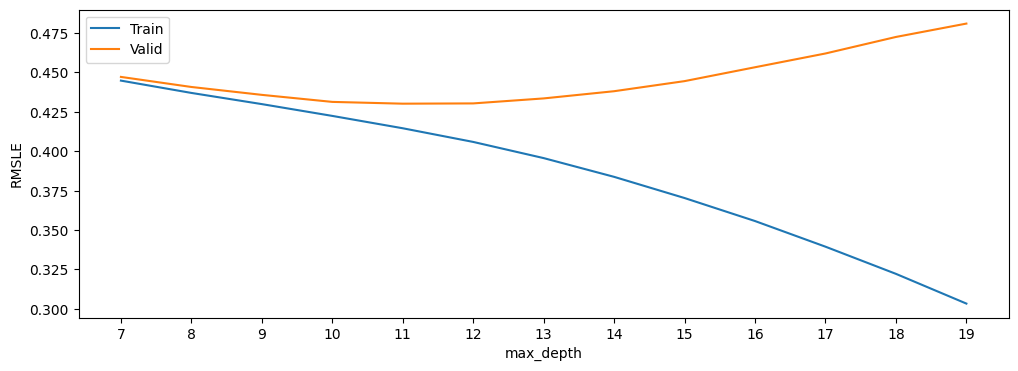

In [ ]:
# визуализируем изменения RMSLE в зависимости от max_depth
fig, ax = plt.subplots(figsize = (12, 4))          # фигура + координатная плоскость
ax.plot(max_depths, train_scores, label = 'Train') # линейный график для тренировочной выборки
ax.plot(max_depths, valid_scores, label = 'Valid') # линейный график для валидационной выборки
ax.set_xlabel('max_depth')                         # название оси абсцисс
ax.set_ylabel('RMSLE')                             # название оси ординат
ax.set_xticks(max_depths)                          # метки на оси абсцисс
ax.legend();                                       # отображение легенды

In [ ]:
# извлекаем индекс лучшего RMSLE на валидационной выборке
best_index = valid_scores.index(min(valid_scores))
print('Оптимальная глубина дерева решений:', max_depths[best_index])
print('RMSLE на тренировочной выборке:', round(train_scores[best_index], 2))
print('RMSLE на валидационной выборке:', round(valid_scores[best_index], 2))

Оптимальная глубина дерева решений: 11
RMSLE на тренировочной выборке: 0.41
RMSLE на валидационной выборке: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
model_RFR = ensemble.RandomForestRegressor(n_estimators = 200,
                                           max_depth = 12,
                                           criterion = 'squared_error',
                                           min_samples_split = 20,
                                           random_state = 42,
                                           verbose=True)
model_RFR.fit(X_train, y_train_log)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 26.5min finished


RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      random_state=42, verbose=True)

In [ ]:
y_train_log_predict=model_RFR.predict(X_train)
y_valid_log_predict=model_RFR.predict(X_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.0s finished


In [ ]:
print('RMSE for train: %.2f' % mse(y_train_log,y_train_log_predict,squared=False))
print('RMSE for valid: %.2f' % mse(y_valid_log,y_valid_log_predict,squared=False))

RMSE for train: 0.40
RMSE for valid: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
model_GBR = ensemble.GradientBoostingRegressor(
    learning_rate = 0.5,
    n_estimators = 100,
    max_depth = 6,
    min_samples_split = 30,
    random_state = 42,
    verbose=True
    )
model_GBR.fit(X_train, y_train_log)

      Iter       Train Loss   Remaining Time 
         1           0.3110           10.89m
         2           0.2247           10.79m
         3           0.1987           10.68m
         4           0.1876           10.60m
         5           0.1823           10.48m
         6           0.1783           10.35m
         7           0.1756           10.25m
         8           0.1730           10.12m
         9           0.1709           10.00m
        10           0.1696            9.87m
        20           0.1577            8.76m
        30           0.1538            7.62m
        40           0.1502            6.55m
        50           0.1480            5.45m
        60           0.1451            4.34m
        70           0.1431            3.24m
        80           0.1410            2.16m
        90           0.1393            1.08m
       100           0.1383            0.00s


GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42, verbose=True)

In [ ]:
y_train_log_predict=model_GBR.predict(X_train)
y_valid_log_predict=model_GBR.predict(X_valid)

In [ ]:
print('RMSE for train: %.2f' % mse(y_train_log,y_train_log_predict,squared=False))
print('RMSE for valid: %.2f' % mse(y_valid_log,y_valid_log_predict,squared=False))

RMSE for train: 0.37
RMSE for valid: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'vendor_id'),
  Text(1, 0, 'passenger_count'),
  Text(2, 0, 'pickup_longitude'),
  Text(3, 0, 'pickup_latitude'),
  Text(4, 0, 'dropoff_longitude'),
  Text(5, 0, 'dropoff_latitude'),
  Text(6, 0, 'store_and_fwd_flag'),
  Text(7, 0, 'pickup_hour'),
  Text(8, 0, 'pickup_holiday'),
  Text(9, 0, 'total_distance'),
  Text(10, 0, 'total_travel_time'),
  Text(11, 0, 'number_of_steps'),
  Text(12, 0, 'haversine_distance'),
  Text(13, 0, 'temperature'),
  Text(14, 0, 'pickup_day_of_week_1'),
  Text(15, 0, 'pickup_day_of_week_2'),
  Text(16, 0, 'pickup_day_of_week_3'),
  Text(17, 0, 'pickup_day_of_week_4'),
  Text(18, 0, 'pickup_day_of_week_5'),
  Text(19, 0, 'pickup_day_of_week_6'),
  Text(20, 0, 'geo_cluster_1'),
  Text(21, 0, 'geo_cluster_3'),
  Text(22, 0, 'geo_cluster_5'),
  Text(23, 0, 'geo_cluster_7'),
  Text(24, 0, 'geo_cluster_9')])

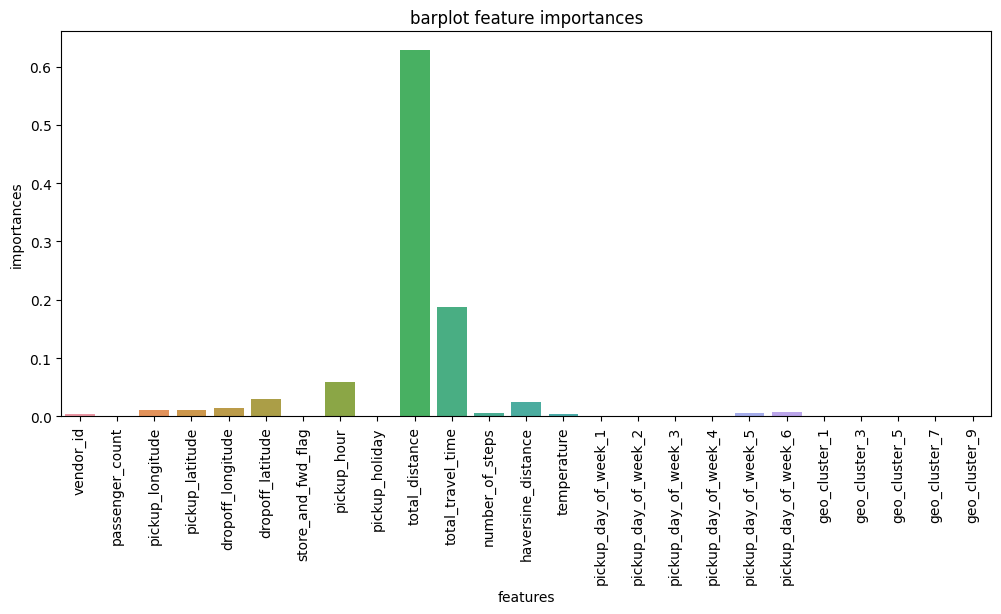

In [ ]:
features = X_train.columns
importances = model_GBR.feature_importances_

plt.figure(figsize=(12,5))
sns.barplot(x=features, y=importances)
plt.xlabel("features")
plt.ylabel("importances")
plt.title("barplot feature importances")
plt.xticks(rotation=90)

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
from sklearn.metrics import median_absolute_error as MeAE

In [ ]:
y_valid = np.exp(y_valid_log) - 1
y_valid_predict_exp = np.exp(y_valid_log_predict) - 1
meae_valid = MeAE(y_valid,y_valid_predict_exp)

In [ ]:
print('MeAE на валидационной выборке:', round(meae_valid/60,1), 'мин')

MeAE на валидационной выборке: 1.8 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
# !unzip Project5_test_data.zip
# !unzip Project5_osrm_data_test.zip

Archive:  Project5_test_data.zip
  inflating: Project5_test_data.csv  
Archive:  Project5_osrm_data_test.zip
  inflating: Project5_osrm_data_test.csv  


In [ ]:
test_data = pd.read_csv("Project5_test_data.csv")
osrm_data_test = pd.read_csv("Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data (test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = mm_scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
y_test_log_predict=model_GBR.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
y_test_predict = np.exp(y_test_log_predict) - 1

In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_GBR.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20,
            'eta': 0.1,
            'colsample_bytree': 0.9,
            'max_depth': 6,
            'subsample': 0.9,
            'lambda': 1,
            'nthread': -1,
            'booster' : 'gbtree',
            'eval_metric': 'rmse',
            'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars,            #гиперпараметры модели
    dtrain=dtrain,              #обучающая выборка
    num_boost_round=300,        #количество моделей в ансамбле
    evals=watchlist,            #выборки, на которых считается матрица
    early_stopping_rounds=20,   #раняя остановка
    maximize=False,             #смена поиска максимума на минимум
    verbose_eval=10             #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42222	valid-rmse:5.42195
[10]	train-rmse:1.93570	valid-rmse:1.93568
[20]	train-rmse:0.78554	valid-rmse:0.78636
[30]	train-rmse:0.47951	valid-rmse:0.48155
[40]	train-rmse:0.42185	valid-rmse:0.42460
[50]	train-rmse:0.40989	valid-rmse:0.41310
[60]	train-rmse:0.40505	valid-rmse:0.40877
[70]	train-rmse:0.40116	valid-rmse:0.40524
[80]	train-rmse:0.39927	valid-rmse:0.40366
[90]	train-rmse:0.39777	valid-rmse:0.40257
[100]	train-rmse:0.39563	valid-rmse:0.40071
[110]	train-rmse:0.39439	valid-rmse:0.39970
[120]	train-rmse:0.39358	valid-rmse:0.39911
[130]	train-rmse:0.39259	valid-rmse:0.39838
[140]	train-rmse:0.39160	valid-rmse:0.39779
[150]	train-rmse:0.39048	valid-rmse:0.39699
[160]	train-rmse:0.38983	valid-rmse:0.39661
[170]	train-rmse:0.38900	valid-rmse:0.39602
[180]	train-rmse:0.38819	valid-rmse:0.39555
[190]	train-rmse:0.38706	valid-rmse:0.39485
[200]	train-rmse:0.38625	valid-rmse:0.39430
[210]	train-rmse:0.38552	valid-rmse:0.39397
[220]	train-rmse:0.38475	valid-rmse:0.39360

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39167


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

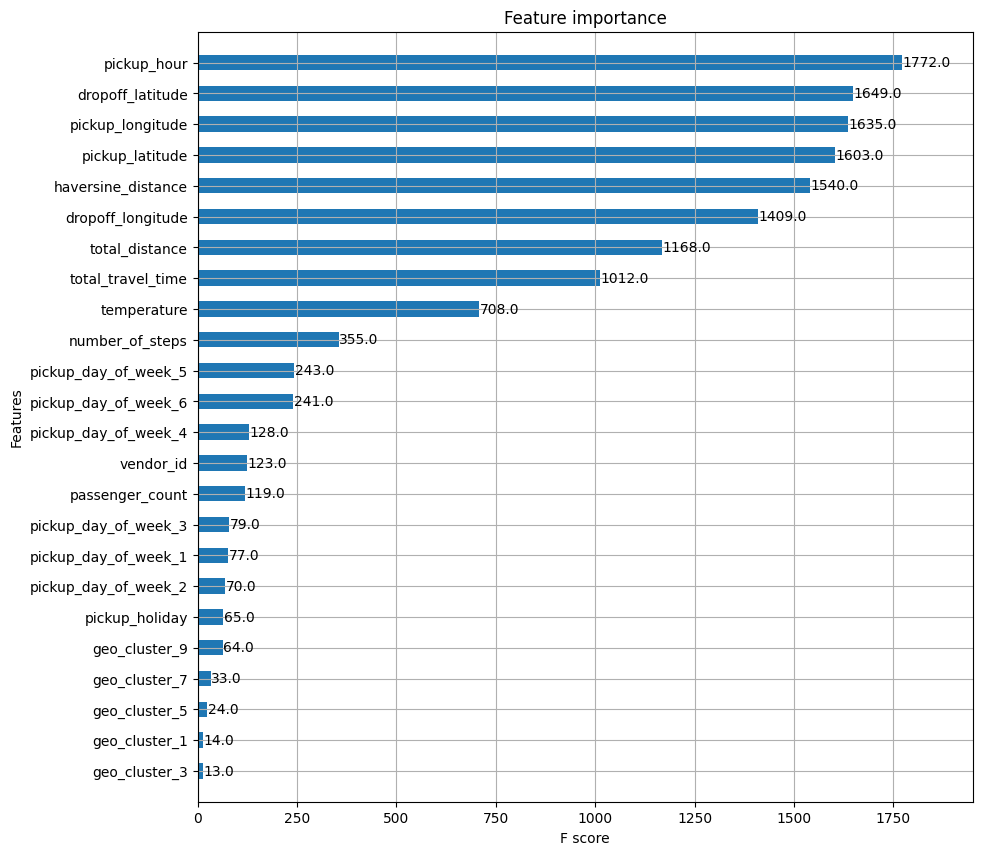

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
xgb.plot_importance(model, ax = ax, height=0.5)